<span style="font-size: 14pt">EREVAN, May-June 2017</span>

<span style="font-size: 16pt"> Practice day #1: ES models </span>

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h1 align="center">Info</h1> 
This is first laboratory task for the course TSA.
The Lab is desinged to impove skills of tuning parameters of ES models and get experience of coding of simple Regression Models.

The Lab should take about 5-6 hours to be completed.

<h1 align="center">Important Info</h1> 
- <span style="font-size: 14pt;"> You must send your solution to the email </span> <span style="color:red; font-size: 12pt;">alexromsput@gmail.com, </span>
- The theme of your message must be <span style="color:red; font-size: 12pt;"> TSA-Erevan-2017-[Your Surname] </span>, for exmaple -- TSA-Erevan-2017-Romanenko,
- The file in attachment of the letter must be named as <span style="color:red; font-size: 12pt;"> [Surname]-[Group]-Lab1.ipnb</span>, for example -- Romanenko-Evening-Lab1.ipnb,
  
<span style="color:red; font-size: 14pt;"> DEADLINE: 7 June 2017 23:59:59 </span>


<h1 align="center">1. Realization of ES models(50%)</h1>
Solve the task fo Prcatice Day 1 and put you solution (that means cells and outputs) below

Link to Prcatice Day 1
https://github.com/DanielBaghdasaryan/TS/blob/master/Practice%20Day%20Task.ipynb

<h1 align="center">2. Forecasting real TS (50%)</h1>

* I.   Download datasets (see Student ID in sheet 'Notes' <a href="https://drive.google.com/open?id=11-lzxxR0aeBmEDGEW1GiIaP4X3fyCTHxTg4b0wALpzs">here </a>) and put it into pandas Data Frame:
     - for those whose Student ID = 0 mod 3 - <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep36.csv</span> 
     - for those whose Student ID = 1 mod 3 - <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep42.csv</span> 
     - for those whose Student ID = 2 mod 3 - <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep6.csv </span>
     
<a href='https://1drv.ms/f/s!AqGgzb5T4tvShZ1-xS0s6FhP5x-05g'>link to the folder with datasets</a>

Answer questions: are there TS with seaonality in data? which is the seasonality period?
(Hint: you just need to look at aggregate data by each shop).

* II. Define the beginning of the history and the end of the history of TS (for TS_dep36.csv the beginning is 12.05.2005, the end is 13.06.2006)
    
* III. For TS_dep36.csv Find the best ES algorithm (it means ES model + its optimal parameters) for each TS by next sheme:
     
     
     - 0) Use only following ES models: IES (see seminar 2), AES (see seminar 2), Winters with additive seasonality (see Practice Day 1 task 3), Theil-Wage (see Practice Day 1 task 4).
     
     
     - 1) forecasting delay $h = 1$, loss function is MACAPE;
     
     
     - 2) For all models find optimal params of each ES models using first 75% of dates (for TS_dep36.csv from 12.05.2005 to 12.03.2006);
     
     
     - 3) forecast each TS by each ES Model with optimal params using first 90% of dates (for TS_dep36.csv from 12.05.2005 to 30.04.2006);
     - 4) find the optimal ES algorithm: just compare losses of ES models with optimal params calclated for dates that were not used for tuning parameters (for TS_dev36.csv: from 13.03.2006 to 30.04.2006).
    
    You need to remember optimal ES algorithm for each TS!
    
     - 5) Build barchar (histogram) of losses of optimal ES algorithm (were calulated at step before) for all TS (axis x - value of loss, axis y - percentage of TS that have such loss). Here you must exclude those TS which has only NaNs in period under consideration.
            
* IV. Calculate Forecast for each TS by optimal TS algorithm that you find in step 3 for all dates (for TS_dep36.csv from 12.05.2005 to 13.06.2006). 

       
     - 1) Measure accuracy (loss) of forecast for each TS using dates that were not used in step 2)-3) (for TS_dep36.csv from 12.05.2005 to 12.03.2006), here you must exclude those TS which has only NaNs in the end.
    
     - 2) Build barchar (histogram) of losses of optimal ES algorithm for all TS (axis x - value of loss, axis y - percentage of TS that has such loss), here you must exclude those TS which has only NaNs in period under consideration.

     - 3) Are barcharts calculated in step III.4) and in step IV.2) the same? If they differ than say in what manner.

<h1 align="center">I</h1>
The data is downloaded.

I'll answer the question after II

<h1 align="center">II</h1>

In [1]:
import pandas as pd
import math
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from IPython import display
import statsmodels.api as sm

/home/daniel/.local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


/home/daniel/.local/lib/python2.7/site-packages/ipykernel_launcher.py:9: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


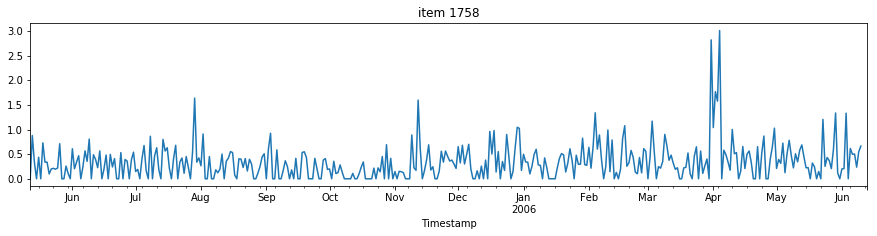

In [23]:
%matplotlib inline
# Read data
ts = pd.read_csv('TS_dep36.csv', sep=';', index_col='Timestamp', parse_dates=True, dayfirst=True)

# START Clean data
ts_trimed = pd.read_csv('TS_dep36.csv', sep=';', index_col='Timestamp', parse_dates=True, dayfirst=True).dropna()
for col in ts.columns: 
    try:
        if ',' in np.array(ts_trimed[col]).sum():
            ts[col]=ts[col].str.replace(',','.').convert_objects(convert_numeric=True)
    except:
        continue
# END Clean data

for col in ts.columns:
    ts[col].plot(figsize=(15,3))
    plt.title(col)
    plt.show()
    break # If you remove 'break', you will see that all TS-s ploted correctly, that means datas ready to use.

##### Search seasonality using aggregated by items data

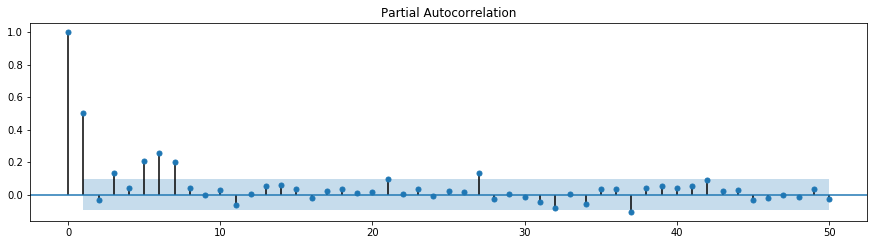

In [22]:
ts_aggregate=ts.replace(np.nan,0)
ts_aggregate=ts_aggregate.sum(axis=1)
# ts_aggregate.plot(figsize=(15,3))

fig = plt.figure(figsize=(15,8))
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_aggregate.values.squeeze(), lags=50, ax=ax2)
plt.show()

### Answer:
We can't notice any strong seasonality. In the future we will take a weak as a period. The same thing is with separate dates also. I don't show it for saving the space.

<br /><br /><br />
<h1 align="center">III</h1>

## Step 0

#### Models

In [21]:
def InitExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    AdaptationPeriod=Params['AdaptationPeriod']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    y = x[0]
    t0=0
    for t in range(0, T):
        if not math.isnan(x[t]):
            if math.isnan(y):
                y=x[t]
                t0=t
            if (t-t0+1)<AdaptationPeriod:
                y = y*(1-alpha)*(t-t0+1)/(AdaptationPeriod) + (1-(1-alpha)*(t-t0+1)/(AdaptationPeriod))*x[t]
            else:
                y = y*(1-alpha) + alpha*x[t]
            #else do not nothing
        FORECAST[t+h] = y
    return FORECAST

def AdaptiveExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    gamma = Params['gamma']
    AdaptationPeriod=Params['AdaptationPeriod']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    y = np.NaN
    t0= np.NaN
    e1= np.NaN
    e2= np.NaN
    Kt_1 = alpha
    K=alpha
    for t in range(0, T):
        if not math.isnan(x[t]):
            if math.isnan(y):
                y=x[t]
                t0=t
                e1=alpha
                e2 = 1
            else:
                if (t-t0)<h:
                    e1 = gamma*(x[t]-y)+(1-gamma)*e1
                    e2 = gamma*np.abs(x[t]-y)+(1-gamma)*e2
                else:
                    e1 = gamma*(x[t]-FORECAST[t])+(1-gamma)*e1
                    e2 = gamma*np.abs(x[t]-FORECAST[t])+(1-gamma)*e2
            
            if e2==0:
                K=alpha
            else:
                K=np.abs(e1/e2)

            alpha=Kt_1
            Kt_1=K

            if (t-t0+1)<AdaptationPeriod:
                y = y*(1-alpha)*(t-t0+1)/(AdaptationPeriod) + (1-(1-alpha)*(t-t0+1)/(AdaptationPeriod))*x[t]
            else:
                y = y*(1-alpha) + (alpha)*x[t]
        FORECAST[t+h] = y
    return FORECAST

def WintersExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    gamma = Params['gamma']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN]*(T+h)
    
    l= np.NaN
    s= []
    for i in range(p):
        if not math.isnan(x[i]):
            s.append(x[i])
        else:
            s.append(s[i-1])
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= x[cntr]
            if len(s)==0:
                for i in range(p):
                    s.append(x[i])
            if cntr<p:
                l = alpha*(x[cntr]-s[cntr])+(1-alpha)*l # recurrent smoothing of level 
            else:
                s_old=s[cntr%p]
                s[cntr%p]=gamma*(x[cntr]-l)+(1-gamma)*s[cntr%p]
                l = alpha*(x[cntr]-s_old)+(1-alpha)*l # recurrent smoothing of level 
                
                
        FORECAST[cntr+h] = l + s[(cntr+1)%p]
    return FORECAST

def TWExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    gamma = Params['gamma']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN]*(T+h)
    
    l= np.NaN
    b=np.NaN
    s= []
    for i in range(p):
        if not math.isnan(x[i]):
            s.append(x[i])
        else:
            s.append(s[i-1])

    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= x[cntr]
            if math.isnan(b):
                b= 0
            if cntr<p:
                l_old=l
                l = alpha*(x[cntr]-s[cntr])+(1-alpha)*(l+b)
                b=beta*(l-l_old)+(1-beta)*b
            else:
                l_old=l
                s_old=s[cntr%p]
                s[cntr%p]=gamma*(x[cntr]-l)+(1-gamma)*s[cntr%p]
                l = alpha*(x[cntr]-s_old)+(1-alpha)*(l+b) # recurrent smoothing of level 
                b=beta*(l-l_old)+(1-beta)*b
            
        FORECAST[cntr+h] = l+b + s[(cntr+h)%p]
    return FORECAST

<br /><br />
## Step 1

#### Loss function

In [9]:
def qualityMACAPE(x,y):
    qlt = (2*(x-y).abs()/(x+y)).abs().replace([np.inf, -np.inf], np.nan)
    return qlt.mean() , (x-y).abs()


<br /><br />
## Step 2

* I use the data from '2005-05-12'-'2006-03-12'. For each model I find best params for EACH of TS and save values in corresponding .csv files (see that directory https://github.com/DanielBaghdasaryan/TS/tree/master/params).

* For finding best params i use 11 values in [0,1].

* In IES and AES I use "Adaptation period"=10. But the results for values from 5 to 10 are almost same.

* In the models with more than one params (AES, WES, TWES), I use the method of sequentual approximations. I.e. e.g. for WES

    1. initialize any $\alpha$-s and $\gamma$-s
    
    2. for initialised $\alpha$-s find best $\gamma$-s and vice versa
    
    3. for new $\alpha$-s find best $\gamma$-s and vice versa
    
    4. do it untill mean_LF(new $\alpha$-s and previous $\gamma$-s)=mean_LF(previous $\alpha$-s and new $\gamma$-s), and both stop changes

In [10]:
ts_par=ts['2005-05-12':'2006-03-12']
line=np.linspace(0,1,11)

h = 1
start = ts_par.index[-1]+timedelta(1)
end = ts_par.index[-1]+timedelta(h)
rng = pd.date_range(start, end)

best=np.zeros([len(ts.columns),4,3])
ies = pd.DataFrame(index = ts_par.index.append(rng), columns = ts.columns)
aes = pd.DataFrame(index = ts_par.index.append(rng), columns = ts.columns)
w = pd.DataFrame(index = ts_par.index.append(rng), columns = ts.columns)
tw = pd.DataFrame(index = ts_par.index.append(rng), columns = ts.columns)

#### IES

In [23]:
j=0
accs=[]
for alpha in line:
    accs.append([])
    i=0
    for col in ts.columns:
        print(j)
        print(i)
        display.clear_output(wait=True)
        ies[col] = InitExponentialSmoothing(ts_par[col], h, {'alpha':alpha, 'AdaptationPeriod': 10})
        accs[j].append(1-qualityMACAPE(ies[col],ts_par[col])[0])
        i+=1
    j+=1

10
104


In [24]:
ies_accs=np.array(accs)
arg_max_accs=np.argmax(accs, axis=0)
ies_alphas=line[arg_max_accs]
print("IES alphas:\n"+str(ies_alphas))
print(ies_accs.max(axis=0).mean())

ies_alphas = pd.Series(ies_alphas)
ies_alphas.to_csv('params/ies_alphas.csv')

IES alphas:
[ 0.   0.1  0.1  0.1  0.   0.1  0.1  0.   0.   0.   0.1  0.   0.1  0.1  0.
  0.1  0.1  0.   0.1  0.1  0.1  0.   0.   0.1  0.   0.1  0.1  0.1  0.   0.1
  0.1  0.   0.1  1.   0.   0.1  0.1  0.1  0.1  0.1  0.2  0.   0.   0.   0.
  0.1  0.   0.1  0.   0.1  0.1  0.1  0.   0.1  0.   0.1  0.1  0.1  0.1  0.1
  0.   0.   0.1  0.1  0.1  1.   1.   0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
  0.1  0.1  1.   0.   1.   0.1  0.1  0.1  0.1  1.   0.1  0.1  0.1  0.1  0.1
  0.1  0.1  0.   0.1  0.1  0.1  0.1  1.   1.   0.1  0.2  0.1  0.1  0.1  0.1]
0.256956480128


#### AES

In [96]:
aes_alphas=np.ones(len(ts.columns))/10.0
aes_gammas=np.ones(len(ts.columns))/10.0

In [104]:
# j=0
# accs1=[]
# for alpha in line:
#     accs1.append([])
#     i=0
#     for col in ts.columns:
#         print(j)
#         print(i)
#         display.clear_output(wait=True)
#         aes[col] = AdaptiveExponentialSmoothing(ts_par[col], h, {'alpha':alpha, 'gamma': aes_gammas[i], 'AdaptationPeriod':10})
#         accs1[j].append(1-qualityMACAPE(aes[col],ts_par[col])[0])
#         i+=1
#     j+=1

# j=0
accs2=[]
for gamma in line:
    accs2.append([])
    i=0
    for col in ts.columns:
        print('gamma')
        print(j)
        print(i)
        display.clear_output(wait=True)
        aes[col] = AdaptiveExponentialSmoothing(ts_par[col], h, {'alpha':aes_alphas[i], 'gamma': gamma, 'AdaptationPeriod':10})
        accs2[j].append(1-qualityMACAPE(aes[col],ts_par[col])[0])
        i+=1
    j+=1

gamma
10
104


In [105]:
aes_accs1=np.array(accs1)
arg_max_accs1=np.argmax(aes_accs1, axis=0)
aes_alphas=line[arg_max_accs1]

aes_accs2=np.array(accs2)
arg_max_accs2=np.argmax(aes_accs2, axis=0)
aes_gammas=line[arg_max_accs2]

aes_alphas = pd.Series(aes_alphas)
aes_alphas.to_csv('params/aes_alphas.csv'.format(i))

aes_gammas = pd.Series(aes_gammas)
aes_gammas.to_csv('params/aes_gammas.csv'.format(i))

In [106]:
print("AES alphas:\n"+str(np.array(aes_alphas)))
print("AES gammas:\n"+str(np.array(aes_gammas)))

print('\n')
print(aes_accs1.max(axis=0).mean())
# plt.plot(range(len(ts.columns)),accs1.max(axis=0))
# plt.show()
print(aes_accs2.max(axis=0).mean())
# plt.plot(range(len(ts.columns)),accs2.max(axis=0))
# plt.show()

AES alphas:
[ 0.   0.1  0.1  0.1  0.   0.1  0.1  0.   0.   0.   0.1  0.   0.1  0.1  0.
  0.1  0.1  0.   0.1  0.1  0.1  0.   0.   0.1  0.   0.1  0.1  0.1  0.   0.1
  0.1  0.   0.1  1.   0.   0.1  0.1  0.1  0.1  0.1  0.2  0.   0.   0.   0.
  0.1  0.   0.1  0.   0.1  0.1  0.1  0.   0.1  0.   0.1  0.1  0.1  0.1  0.1
  0.   0.   0.1  0.1  0.1  0.   0.   0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
  0.1  0.   1.   0.   0.2  0.1  0.1  0.1  0.1  1.   0.1  0.1  0.1  0.1  0.1
  0.1  0.1  0.   0.1  0.1  0.1  0.1  0.   0.   0.1  0.2  0.1  0.1  0.1  0.1]
AES gammas:
[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   1.   1.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.1  0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0. 

#### WES

In [108]:
w_alphas=np.ones(len(ts.columns))/10.0
w_gammas=np.ones(len(ts.columns))/10.0

In [115]:
j=0
accs1=[]
for alpha in line:
    accs1.append([])
    i=0
    for col in ts.columns:
        print(j)
        print(i)
        display.clear_output(wait=True)
        w[col] = WintersExponentialSmoothing(ts_par[col], h, {'alpha':alpha, 'gamma': w_gammas[i], 'seasonality_period':7})
        accs1[j].append(1-qualityMACAPE(w[col],ts_par[col])[0])
        i+=1
    j+=1

# j=0
# accs2=[]
# for gamma in line:
#     accs2.append([])
#     i=0
#     for col in ts.columns:
#         print('gamma')
#         print(j)
#         print(i)
#         display.clear_output(wait=True)
#         w[col] = WintersExponentialSmoothing(ts_par[col], h, {'alpha':w_alphas[i], 'gamma': gamma, 'seasonality_period':7})
#         accs2[j].append(1-qualityMACAPE(w[col],ts_par[col])[0])
#         i+=1
#     j+=1

10
104


In [116]:
w_accs1=np.array(accs1)
arg_max_accs1=np.argmax(w_accs1, axis=0)
w_alphas=line[arg_max_accs1]
print("WES alphas:\n"+str(w_alphas))

w_accs2=np.array(accs2)
arg_max_accs2=np.argmax(w_accs2, axis=0)
w_gammas=line[arg_max_accs2]
print("WES gammas:\n"+str(w_gammas))

w_alphas = pd.Series(w_alphas)
w_alphas.to_csv('params/w_alphas.csv')

w_gammas = pd.Series(w_gammas)
w_gammas.to_csv('params/w_gammas.csv')


print('\n')
print(w_accs1.max(axis=0).mean())
# plt.plot(range(len(ts.columns)),w_accs1.max(axis=0))
# plt.show()
print(w_accs2.max(axis=0).mean())
# plt.plot(range(len(ts.columns)),w_accs2.max(axis=0))
# plt.show()

WES alphas:
[ 0.   0.   0.1  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.1
  0.   0.1  0.   0.1  0.   0.   0.   0.1  0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.1  0.   0.1  0.   0.   0.1  0.   0.   0.1  0.   0.   0.
  0.1  0.1  0.1  0.1  0.   0.1  0.   0.   0.   0.   0.   0.1  0.   0.   0.
  0.   0.   0.   0.1  0.   0.   0.2  0.   0.1  0.1  0.1  0.1  0.   0.1  0.1
  0.1  0.   0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.2  0.1  0.   0.1  0.1  0.1
  0.1  0.1  0.1  0.1  0.   0.1  0.1  1.   0.3  0.2  0.2  0.1  0.1  0.1  0.1]
WES gammas:
[ 0.2  0.2  0.2  0.3  0.1  0.3  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
  0.1  0.1  0.1  0.   0.2  0.2  0.1  0.1  0.2  0.1  0.1  0.1  0.1  0.2  0.1
  0.1  0.2  0.1  0.1  0.2  0.1  0.1  0.2  0.1  0.2  0.   0.1  0.2  0.1  0.1
  0.2  0.1  0.2  0.1  0.3  0.2  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.3
  0.1  0.1  0.2  0.1  0.3  0.1  0.1  0.2  0.2  0.2  0.1  0.1  0.2  0.1  0.1
  0.   0.1  0.2  0.1  0.2  0.1  0.   0.1  0.1  0.1  0.1  0.1  0.1 

#### TWES

In [67]:
tw_alphas=np.ones(len(ts.columns))/10.0
tw_betas=np.ones(len(ts.columns))/10.0
tw_gammas=np.ones(len(ts.columns))/10.0

In [86]:
# accuracies for alpha
# j=0
# accs1=[]
# for alpha in line:
#     accs1.append([])
#     i=0
#     for col in ts.columns:
#         print(j)
#         print(i)
#         display.clear_output(wait=True)
#         tw[col] = TWExponentialSmoothing(ts_par[col], h, {'alpha':alpha, 'beta':tw_betas[i], 'gamma': tw_gammas[i], 'seasonality_period':7})
#         accs1[j].append(1-qualityMACAPE(tw[col],ts_par[col])[0])
#         i+=1
#     j+=1

# # accuracies for gamma
# j=0
# accs2=[]
# for gamma in line:
#     accs2.append([])
#     i=0
#     for col in ts.columns:
#         print('gamma')
#         print(j)
#         print(i)
#         display.clear_output(wait=True)
#         tw[col] = TWExponentialSmoothing(ts_par[col], h, {'alpha':tw_alphas[i], 'beta':tw_betas[i], 'gamma': gamma, 'seasonality_period':7})
#         accs2[j].append(1-qualityMACAPE(tw[col],ts_par[col])[0])
#         i+=1
#     j+=1

# accuracies for beta
j=0
accs3=[]
for beta in line:
    accs3.append([])
    i=0
    for col in ts.columns:
        print('beta')
        print(j)
        print(i)
        display.clear_output(wait=True)
        tw[col] = TWExponentialSmoothing(ts_par[col], h, {'alpha':tw_alphas[i], 'beta':beta, 'gamma': tw_gammas[i], 'seasonality_period':7})
        accs3[j].append(1-qualityMACAPE(tw[col],ts_par[col])[0])
        i+=1
    j+=1

beta
10
104


In [117]:
tw_accs1=np.array(accs1)
arg_max_accs1=np.argmax(tw_accs1, axis=0)
tw_alphas=line[arg_max_accs1]

tw_accs2=np.array(accs2)
arg_max_accs2=np.argmax(tw_accs2, axis=0)
tw_gammas=line[arg_max_accs2]

tw_accs3=np.array(accs3)
arg_max_accs3=np.argmax(tw_accs3, axis=0)
tw_betas=line[arg_max_accs3]
print('\n')


tw_alphas = pd.Series(tw_alphas)
tw_alphas.to_csv('params/tw_alphas.csv')

tw_gammas = pd.Series(tw_gammas)
tw_gammas.to_csv('params/tw_gammas.csv')

tw_betas = pd.Series(tw_betas)
tw_betas.to_csv('params/tw_betas.csv')

In [119]:
print("TWES alphas:\n"+str(np.array(tw_alphas)))
print("TWES gammas:\n"+str(np.array(tw_gammas)))
print("TWES betas:\n"+str(np.array(tw_betas)))

print(tw_accs1.max(axis=0).mean())
# plt.plot(range(len(ts.columns)),tw_accs1.max(axis=0))
# plt.show()
print(tw_accs2.max(axis=0).mean())
# plt.plot(range(len(ts.columns)),tw_accs2.max(axis=0))
# plt.show()
print(tw_accs3.max(axis=0).mean())
# plt.plot(range(len(ts.columns)),tw_accs3.max(axis=0))
# plt.show()

TWES alphas:
[ 0.   0.   0.1  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.1  0.   0.1  0.   0.   0.   0.1  0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.1  0.   0.   0.   0.   0.   0.1  0.   0.   0.
  0.1  0.   0.1  0.   0.   0.1  0.   0.   0.   0.   0.   0.1  0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.1  0.   0.1  0.1  0.   0.   0.   0.   0.1
  0.1  0.   0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.2  0.1  0.   0.1  0.1  0.1
  0.1  0.1  0.1  0.1  0.   0.1  0.1  1.   0.3  0.2  0.2  0.1  0.1  0.1  0.1]
TWES gammas:
[ 0.2  0.2  0.2  0.3  0.1  0.3  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.2
  0.1  0.1  0.1  0.   0.2  0.2  0.1  0.1  0.2  0.1  0.1  0.1  0.1  0.2  0.1
  0.1  0.2  0.1  1.   0.2  0.1  0.1  0.2  0.2  0.2  0.   0.1  0.2  0.1  0.1
  0.2  0.2  0.2  0.2  0.3  0.2  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.3
  0.1  0.1  0.2  0.2  0.3  0.1  0.1  0.2  0.2  0.2  0.3  0.2  0.2  0.2  0.1
  0.   0.1  0.2  0.1  0.2  0.1  0.   0.1  0.1  0.1  0.1  0.1  0.1

## Step 3

Get found best params from saved .csv files

In [11]:
ies_alphas=np.array(pd.read_csv('params/ies_alphas.csv',header=None))[:,1]
aes_alphas=np.array(pd.read_csv('params/aes_alphas.csv',header=None))[:,1]
aes_gammas=np.array(pd.read_csv('params/aes_gammas.csv',header=None))[:,1]
w_alphas=np.array(pd.read_csv('params/w_alphas.csv',header=None))[:,1]
w_gammas=np.array(pd.read_csv('params/w_gammas.csv',header=None))[:,1]
tw_alphas=np.array(pd.read_csv('params/tw_alphas.csv',header=None))[:,1]
tw_betas=np.array(pd.read_csv('params/tw_betas.csv',header=None))[:,1]
tw_gammas=np.array(pd.read_csv('params/tw_gammas.csv',header=None))[:,1]

I use the data from '2005-05-12' - '2006-04-30' to make prediction

In [77]:
ts_for=ts['2005-05-12':'2006-04-30']

h = 1
start = ts_for.index[-1]+timedelta(1)
end = ts_for.index[-1]+timedelta(h)
rng = pd.date_range(start, end)

ies = pd.DataFrame(index = ts_for.index.append(rng), columns = ts.columns)
aes = pd.DataFrame(index = ts_for.index.append(rng), columns = ts.columns)
w = pd.DataFrame(index = ts_for.index.append(rng), columns = ts.columns)
tw = pd.DataFrame(index = ts_for.index.append(rng), columns = ts.columns)

i=0
for col in ts.columns:
    print(i)
    display.clear_output(wait=True)
    ies[col] = InitExponentialSmoothing(ts_for[col], h, {'alpha':ies_alphas[i], 'AdaptationPeriod': 10})
    aes[col] = AdaptiveExponentialSmoothing(ts_for[col], h, {'alpha':aes_alphas[i], 'gamma': aes_gammas[i], 'AdaptationPeriod':10})
    w[col] = WintersExponentialSmoothing(ts_for[col], h, {'alpha':w_alphas[i], 'gamma': w_gammas[i], 'seasonality_period':7})
    tw[col] = TWExponentialSmoothing(ts_for[col], h, {'alpha':tw_alphas[i], 'beta':tw_betas[i], 'gamma': tw_gammas[i], 'seasonality_period':7})
    i+=1


104


## Step 4

Calculating accuracies and finding best models for EACH of TS

In [78]:
ies_accs=[]
aes_accs=[]
w_accs=[]
tw_accs=[]

for col in ts.columns:
    ies_accs.append(1-qualityMACAPE(ies[col]['2006-03-13':],ts_for[col]['2006-03-13':])[0])
    aes_accs.append(1-qualityMACAPE(aes[col]['2006-03-13':],ts_for[col]['2006-03-13':])[0])
    w_accs.append(1-qualityMACAPE(w[col]['2006-03-13':],ts_for[col]['2006-03-13':])[0])
    tw_accs.append(1-qualityMACAPE(tw[col]['2006-03-13':],ts_for[col]['2006-03-13':])[0])

all_accs=np.array([ies_accs,aes_accs,w_accs,tw_accs])

best_models=np.argmax(all_accs, axis=0)

Each element of array bellow means number of best model corresponds to each TS

In [79]:
print('Best models for the series\n')
print('0: IES, 1: AES, 2: WES, 3: TWES\n')

print(best_models)

Best models for the series

0: IES, 1: AES, 2: WES, 3: TWES

[0 0 0 0 2 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 2 2 0 0 2 0 2 2 0 0 0
 2 0 0 0 0 2 0 0 0 2 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 2 2 0 0 0 0 3 2 0
 0 0 2 2 2 0 2 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 2 0 2 0 0 0 2 0 0]


## Step 5
Build the histogram of best Accuracy distribution

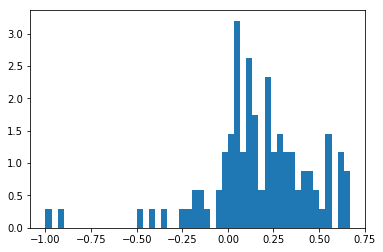

In [80]:
best_all_accs=pd.Series(all_accs.max(axis=0)).dropna()

plt.hist(best_all_accs, bins=50,  normed=1)
plt.show()

<br /><br /><br />
<h1 align="center">IV</h1>
Use whole data to make prediction. Note that each TS predicted individually by one's best model.

In [81]:
ts_all=ts

# Remove TS-s that have NaNs at 10 last cells
for col in ts.columns:
    if len(ts[col]['2006-06-03':].dropna())==0:
        ts_all=ts_all.drop(col, 1)
        
h = 1
start = ts_all.index[-1]+timedelta(1)
end = ts_all.index[-1]+timedelta(h)
rng = pd.date_range(start, end)

es = pd.DataFrame(index = ts_all.index.append(rng), columns = ts_all.columns)

i=0
for col in ts_all.columns:
    print(i)
    display.clear_output(wait=True)
    if best_models[i]==0:
        es[col] = InitExponentialSmoothing(ts_all[col], h, {'alpha':ies_alphas[i], 'AdaptationPeriod': 10})
    elif best_models[i]==1:
        es[col] = AdaptiveExponentialSmoothing(ts_all[col], h, {'alpha':aes_alphas[i], 'gamma': aes_gammas[i], 'AdaptationPeriod':10})
    elif best_models[i]==2:
        es[col] = WintersExponentialSmoothing(ts_all[col], h, {'alpha':w_alphas[i], 'gamma': w_gammas[i], 'seasonality_period':7})
    else:
        es[col] = TWExponentialSmoothing(ts_all[col], h, {'alpha':tw_alphas[i], 'beta':tw_betas[i], 'gamma': tw_gammas[i], 'seasonality_period':7})
    i+=1

92


## Step 4.1

Calculate accuracies for unused data

In [82]:
accs=[]

for col in ts_all.columns:
    accs.append(1-qualityMACAPE(es[col]['2006-04-30':],ts_all[col]['2006-04-30':])[0])

## Step 4.2
Build the histogram of Accuracy distribution

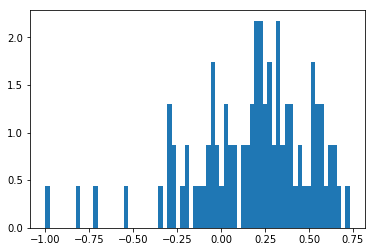

In [83]:
accs=pd.Series(accs).dropna()

plt.hist(accs, bins=70,  normed=1)
plt.show()

## Step 4.3
The barchart for unused data (the last one) has higher probability of accuracies more than 0 (normed arround 0.25). 